In [9]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from statistics import mean
from datetime import date
import file

In [10]:
all_option_leverage = file.load_all_option_leverage()
all_symbols = all_option_leverage.keys()

In [11]:
# start_date = '2023-4-10' # start of MAGS history
start_date = '2023-1-1' # start of uptrend
history_map = {}
symbols=[
        'SMH','USD',
        'SPY','QQQ','TQQQ','FNGS','IGM',
        'MAGS','MAGX',
        # 'NVDA',
         ]
for symbol in symbols:
    tickerData = yf.Ticker(symbol)
    history = tickerData.history(interval='1wk', start=start_date, end=date.today()) # prices are adjusted for splits
    print(f'{symbol} history: {len(history)}w')
    history_map[symbol] = history

SMH history: 103w
USD history: 103w
SPY history: 103w
QQQ history: 103w
TQQQ history: 103w
FNGS history: 103w
IGM history: 103w
MAGS history: 89w
MAGX history: 43w


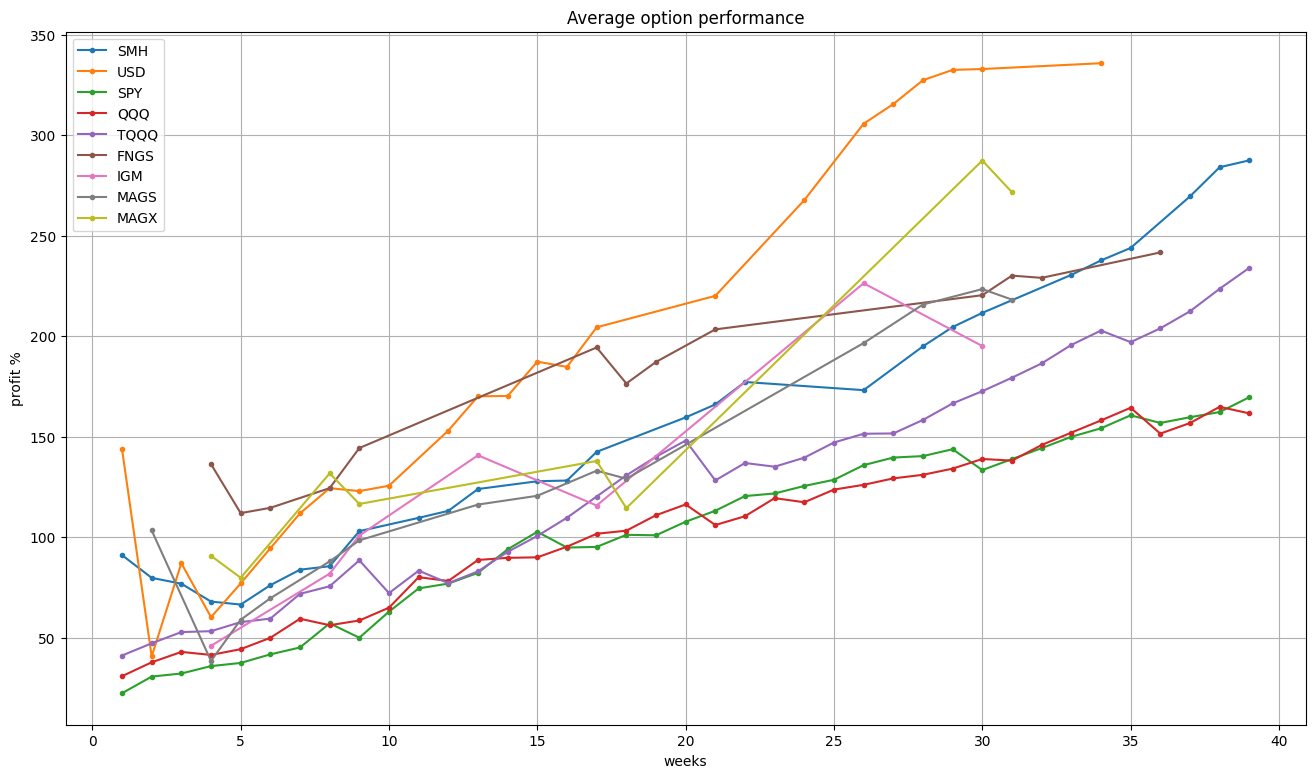

In [12]:
gap = 0 # %
max_weeks = 39 # 3Q

plt.figure(figsize=(16, 9))

for symbol, history in history_map.items():
    data = {}
    option_leverage = all_option_leverage[symbol]
    for weeks, lvr in sorted(option_leverage.items()):
        if weeks > max_weeks:
            break
        stock_changes = history['Close'].pct_change(periods=weeks) * 100
        option_profits = ((stock_changes[weeks:] - gap) * lvr - 100).clip(lower=-100)
        profit = option_profits.mean()
        data[weeks] = profit
    plt.plot(*zip(*sorted(data.items())), label=symbol, marker='.')

plt.legend()
plt.title(f'Average option performance')
plt.xlabel('weeks')
plt.ylabel('profit %')
plt.grid()
plt.show()

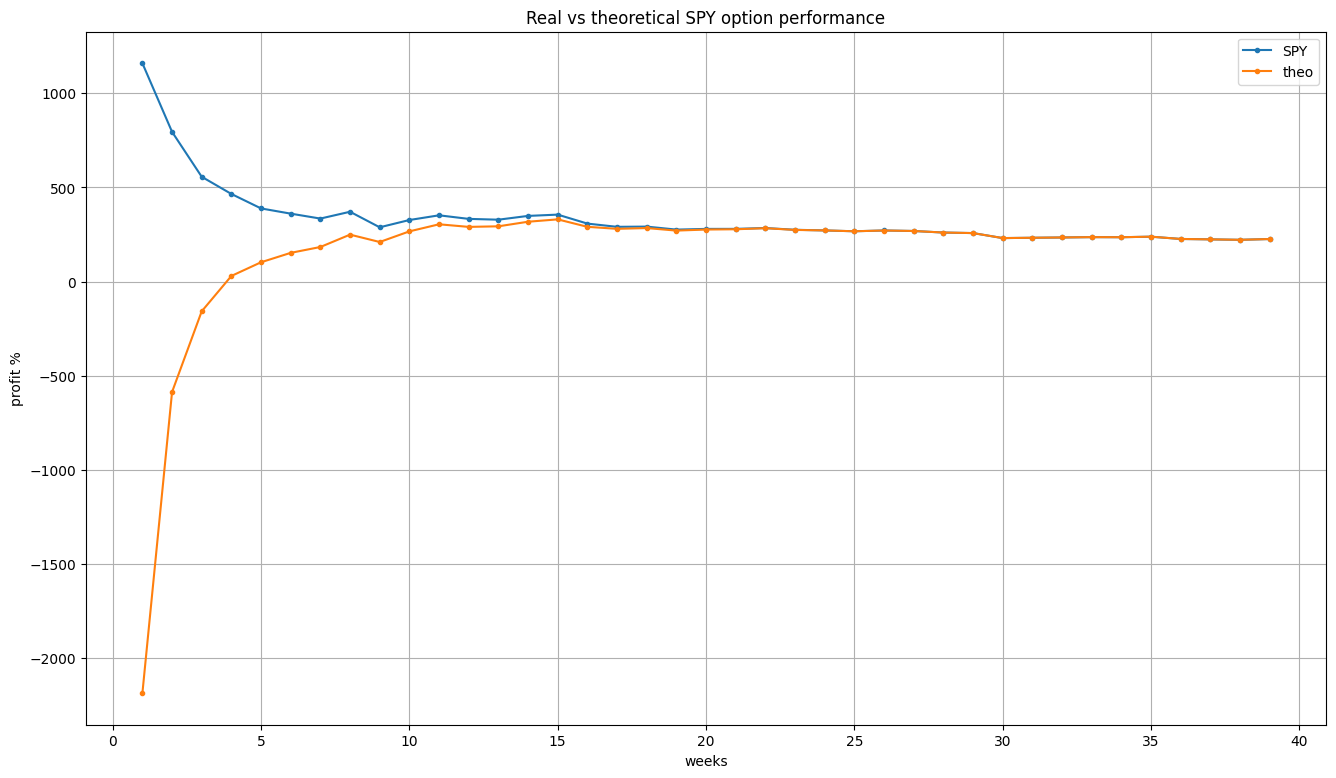

In [13]:
gap = 0 # %
max_weeks = 39 # 3Q

plt.figure(figsize=(16, 9))

symbol = 'SPY'
history = history_map[symbol]
data = {}
theo = {}
option_leverage = all_option_leverage[symbol]
for weeks, lvr in sorted(option_leverage.items()):
    if weeks > max_weeks:
        break
    stock_changes = history['Close'].pct_change(periods=weeks) * 100
    option_profits = ((stock_changes[weeks:] - gap) * lvr - 100).clip(lower=-100)
    profit = option_profits.mean()
    data[weeks] = profit * 52 / weeks
    theo[weeks] = (stock_changes[weeks:].mean() * lvr - 100) * 52 / weeks
plt.plot(*zip(*sorted(data.items())), label=symbol, marker='.')
plt.plot(*zip(*sorted(theo.items())), label='theo', marker='.')

plt.legend()
plt.title(f'Real vs theoretical SPY option performance')
plt.xlabel('weeks')
plt.ylabel('profit %')
plt.grid()
plt.show()

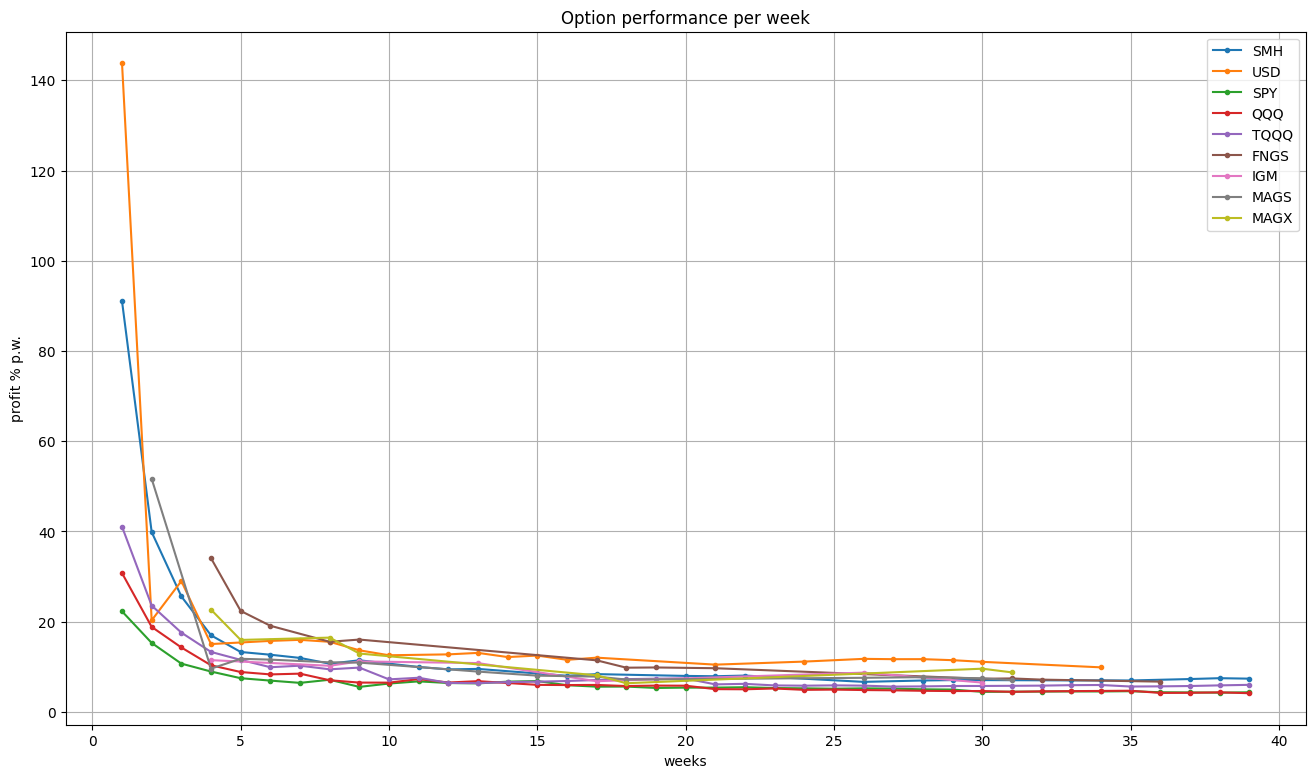

In [14]:
gap = 0 # %
max_weeks = 39 # 3Q

plt.figure(figsize=(16, 9))

for symbol, history in history_map.items():
    data = {}
    option_leverage = all_option_leverage[symbol]
    for weeks, lvr in sorted(option_leverage.items()):
        if weeks <= max_weeks:
            stock_changes = history['Close'].pct_change(periods=weeks) * 100
            option_profits = ((stock_changes[weeks:] - gap) * lvr - 100).clip(lower=-100)
            profit = option_profits.mean() / weeks
            data[weeks] = profit
    plt.plot(*zip(*sorted(data.items())), label=symbol, marker='.')

plt.legend()
plt.title(f'Option performance per week')
plt.xlabel('weeks')
plt.ylabel('profit % p.w.')
plt.grid()
plt.show()

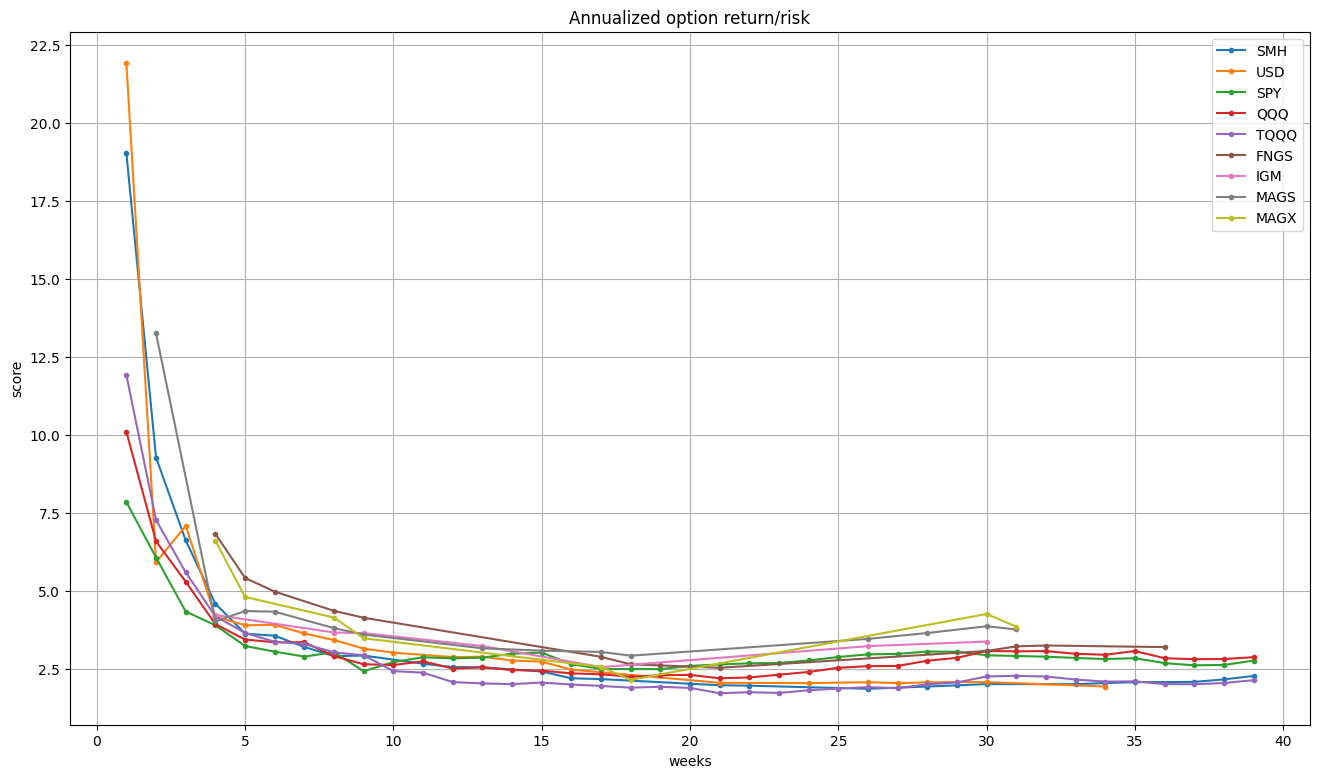

In [15]:
gap = 0 # %
max_weeks = 39 # 3Q

plt.figure(figsize=(16, 9))

for symbol, history in history_map.items():
    data = {}
    option_leverage = all_option_leverage[symbol]
    for weeks, lvr in sorted(option_leverage.items()):
        if weeks <= max_weeks:
            stock_changes = history['Close'].pct_change(periods=weeks) * 100
            option_profits = ((stock_changes[weeks:] - gap) * lvr - 100).clip(lower=-100)
            profit = option_profits.mean() * 52 / weeks / option_profits.std()
            data[weeks] = profit
    plt.plot(*zip(*sorted(data.items())), label=symbol, marker='.')

plt.legend()
plt.title(f'Annualized option return/risk')
plt.xlabel('weeks')
plt.ylabel('score')
plt.grid()
plt.show()

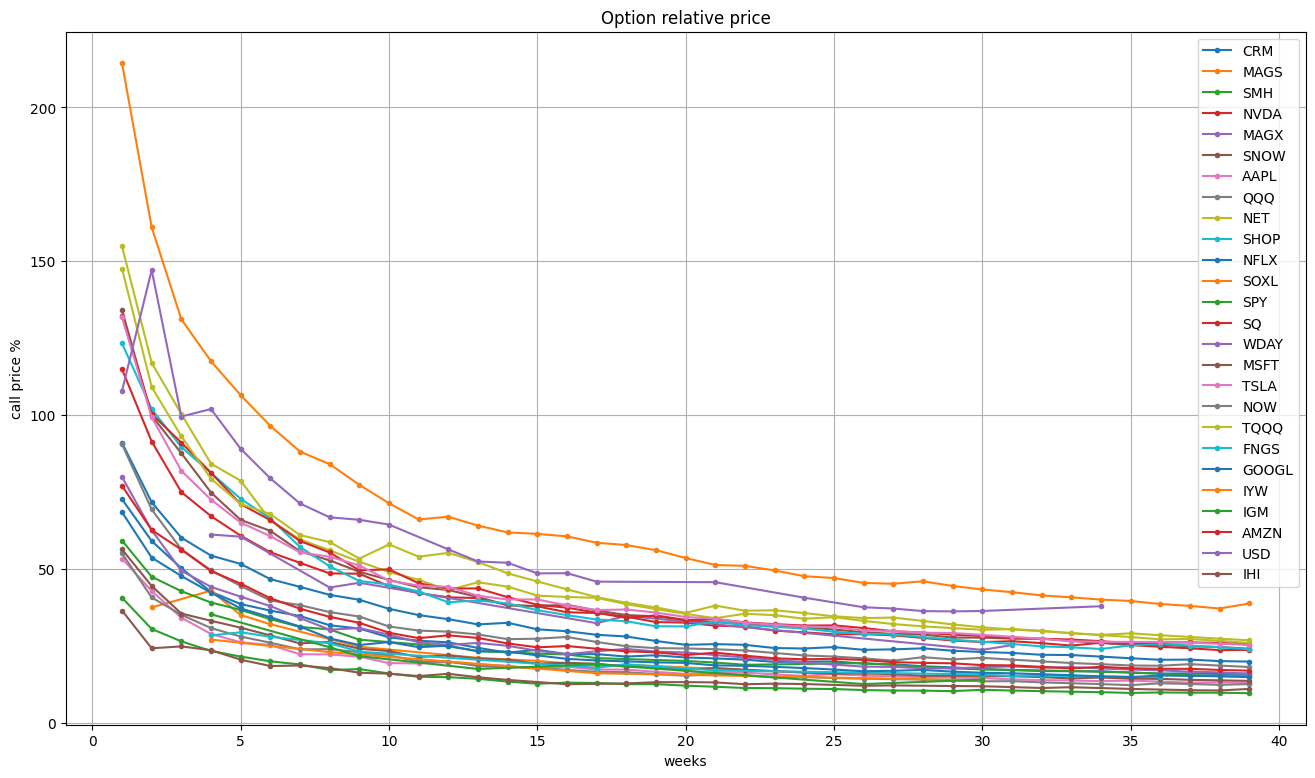

In [18]:
gap = 0 # %
max_weeks = 39 # 3Q

plt.figure(figsize=(16, 9))

for symbol, option_leverage in all_option_leverage.items():
    data = {}
    for weeks, lvr in sorted(option_leverage.items()):
        if weeks <= max_weeks:
            data[weeks] = (100 / lvr) * 52 / weeks
    plt.plot(*zip(*sorted(data.items())), label=symbol, marker='.')

plt.legend()
plt.title(f'Option relative price')
plt.xlabel('weeks')
plt.ylabel('call price %')
plt.grid()
plt.show()